In [1]:
# Common imports
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm2 = ListedColormap(['#0000aa', '#ff2020'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import mglearn

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [4]:
m, n = cancer.data.shape  # (569, n)

In [5]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

**1 将PCA用于cancer数据集并可视化**

对每个特征分别计算两个类别的直方图。为每个特征建立一个直方图，计算具有某一个特征的数据点在特定范围内（bin）的出现频率。

In [6]:
np.histogram([1, 2, 1], bins=[0, 1, 2])

(array([0, 3], dtype=int64), array([0, 1, 2]))

In [7]:
np.histogram([1, 2, 1], bins=4)

(array([2, 0, 0, 1], dtype=int64), array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ]))

> 间隔（bin）：[1, 1.25), [1.25, 1.5), [1.5, 1.75), [1.75, 2.]  
返回元组第一个值是落在每个间隔的元素个数，第二个值是bins。

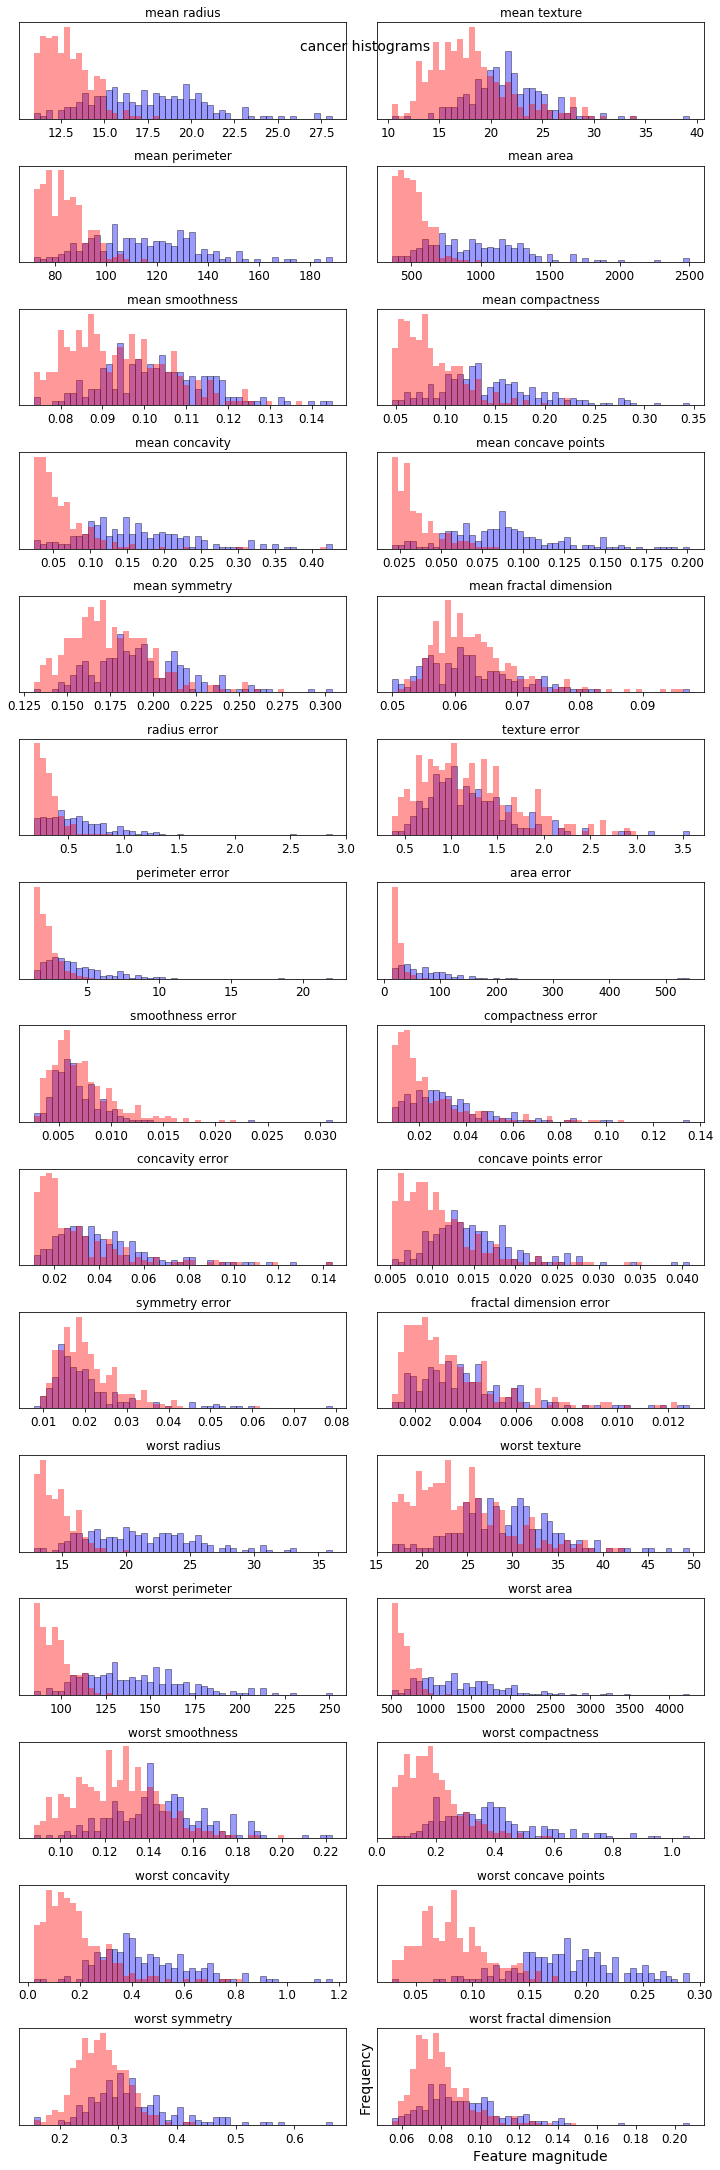

In [8]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()


for i in range(n):  # n特征数，=30
    _, bins = np.histogram(malignant[:, i], bins=50)  # 得到bins
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.4, edgecolor='k')
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.xlabel("Feature magnitude")
plt.ylabel("Frequency")
plt.suptitle("cancer histograms", fontsize=14)
plt.show()

> 重叠的越少，说明信息量越大。

使用PCA，找到前两个主成分：

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(cancer.data)

In [10]:
from sklearn.decomposition import PCA

# only keep the first two principal components of the data
pca = PCA(n_components=2, random_state=42)
# Fit PCA model to beast cancer data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
# Transform the data onto the first two principal components
X_pca = pca.transform(X_scaled)

In [12]:
print("Original shape: {}".format(X_scaled.shape))
print("Reduced shape: {}".format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


对2个主成分作图：

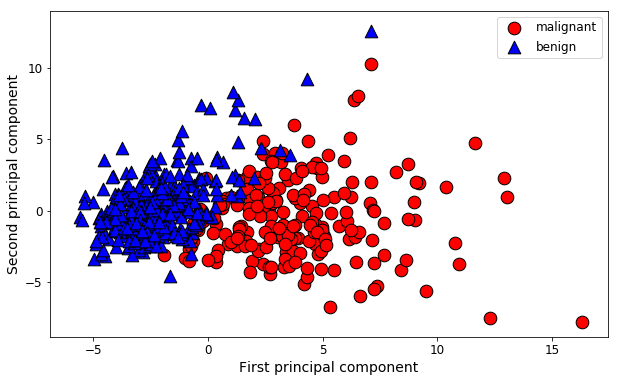

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0][cancer.target == 0], X_pca[:, 1][cancer.target == 0],
            c='r', s=160, edgecolor='k', label="malignant")
plt.scatter(X_pca[:, 0][cancer.target == 1], X_pca[:, 1][cancer.target == 1],
            c='b', s=160, marker='^', edgecolor='k', label="benign")
plt.xlabel("First principal component", fontsize=14)
plt.ylabel("Second principal component", fontsize=14)
plt.legend(loc="best", fontsize="large")
plt.show()

PCA的一个缺点是不容易对图中的两个轴进行解释。**主成分对应原始数据中的方向，所以它们是原始特征的组合（组合往往非常复杂）。**

In [14]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

> 每一行对应一个主成分，按重要性排序（第一主成分排在首位）。  
每一列对应数据原始特征属性。

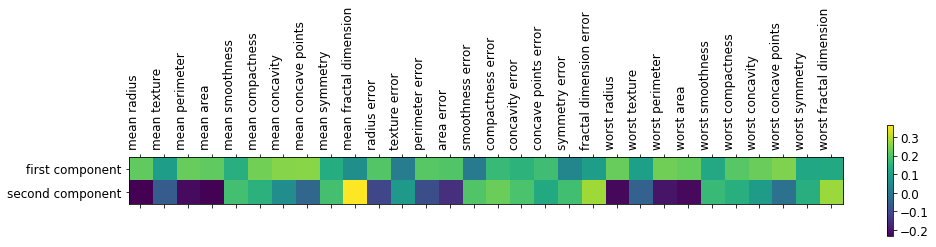

In [15]:
plt.matshow(pca.components_, cmap=plt.cm.viridis)
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(n), cancer.feature_names, rotation=90, ha='right')
plt.show()

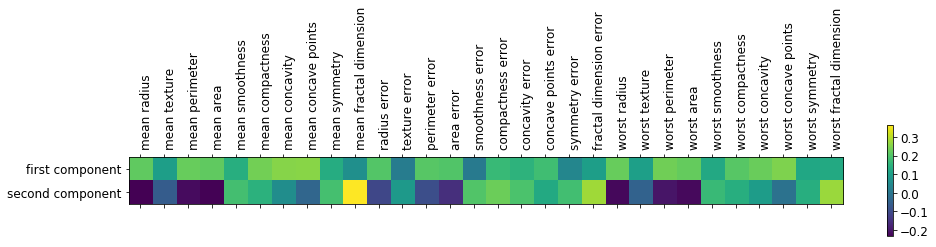

In [16]:
plt.matshow(pca.components_, cmap=plt.cm.viridis)
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(n), cancer.feature_names, rotation=90, ha='left')
plt.show()

In [17]:
# The amount of variance explained by each of the selected components.
# 每个主成分解释的方差量
pca.explained_variance_

array([ 13.30499079,   5.7013746 ])

In [18]:
# Percentage of variance explained by each of the selected components.
# 每个主成分反映了方差的程度
pca.explained_variance_ratio_

array([ 0.44272026,  0.18971182])

In [19]:
# The estimated number of components.
# 主成分数量
pca.n_components

2